## Titanic Survival Disaster Model


#### 1. Understanding the Problem

**Objective:**
    The goal of the Titanic survival model is to predict whether a passenger survived or not based on various features available in the dataset. This is a binary classification problem, where the target variable (survived) has two possible outcomes: 0 (not survived) or 1 (survived).

- Key Points to Understand:
    - Dataset Context:

            The dataset is based on the passengers of the Titanic, which sank on April 15, 1912.
            The sinking of the Titanic is a historical event, and analyzing the data can provide insights into factors that contributed to survival.

    - Features:

            The dataset contains several features (columns) that may influence survival. Common features include:
                PassengerId: Unique identifier for each passenger.
                Survived: Whether the passenger survived (0 = No, 1 = Yes).
                Pclass: Ticket class (1st, 2nd, or 3rd).
                Name: Name of the passenger.
                Sex: Gender of the passenger.
                Age: Age of the passenger.
                SibSp: Number of siblings/spouses aboard.
                Parch: Number of parents/children aboard.
                Fare: Ticket fare.
                Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).

- Importance of Features:

    Understanding which features may impact survival is critical. For example, it’s generally assumed that women and children had a higher chance of survival.

- Evaluation of Success:

    Success will be measured by how accurately the model can predict survival based on the features. We'll use metrics like accuracy, precision, recall, and F1-score to assess performance.

Next Steps
Once you're comfortable with the problem and the dataset overview, we can move on to the next step: Data Exploration. Just let me know when you’re ready!

### 2. Data Exploration
In this step, you’ll explore the Titanic dataset to understand its structure, identify patterns, and check for any missing values. This will help you make informed decisions during data preprocessing.

- Steps to Follow:

    1. Loading the Data:

            Use the Pandas library to load the training data into a DataFrame.
            You can also load the test data for reference.


In [1]:
import pandas as pd

# Load the datasets
train_data = pd.read_csv('D:\\MY WORK\\Python\\Basic Project\\data\\train.csv')
test_data = pd.read_csv('D:\\MY WORK\\Python\\Basic Project\\data\\test.csv')


2. Exploring the Data:

Use various Pandas functions to get a feel for the data.
**Display the first few rows of the training data**

        print(train_data.head())

**Get a summary of the dataset**

        print(train_data.info())

**Check for missing values**

        print(train_data.isnull().sum())

**Get a statistical summary of numerical features**

        print(train_data.describe())

In [2]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


3. Visualizations:

    Use libraries like Matplotlib and Seaborn to create visualizations. This can help you understand the distributions of features and relationships between them.

    

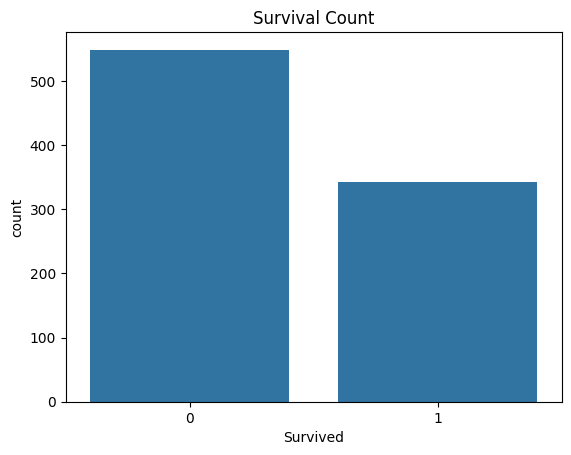

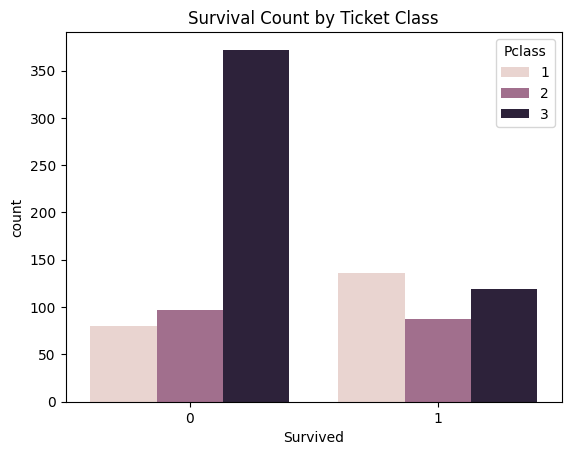

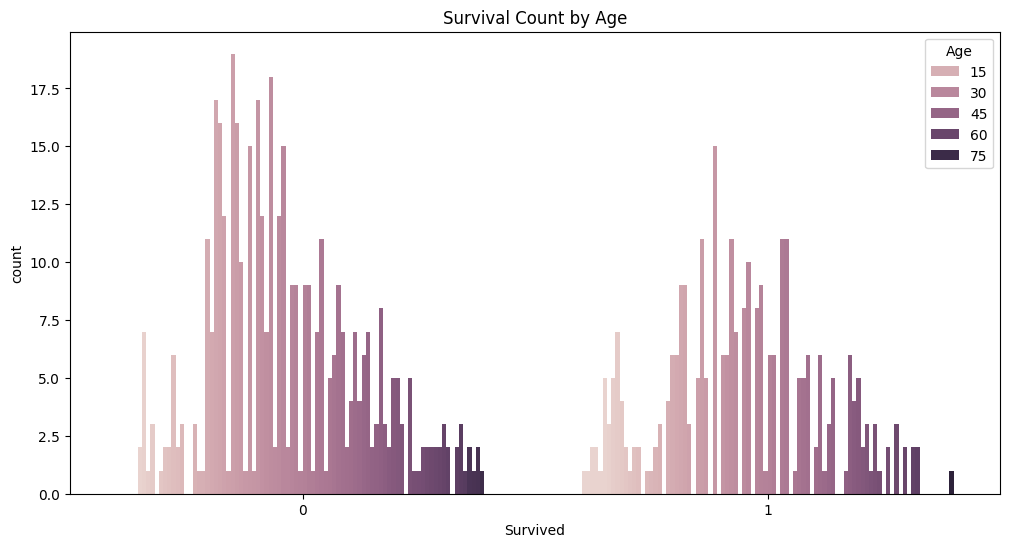

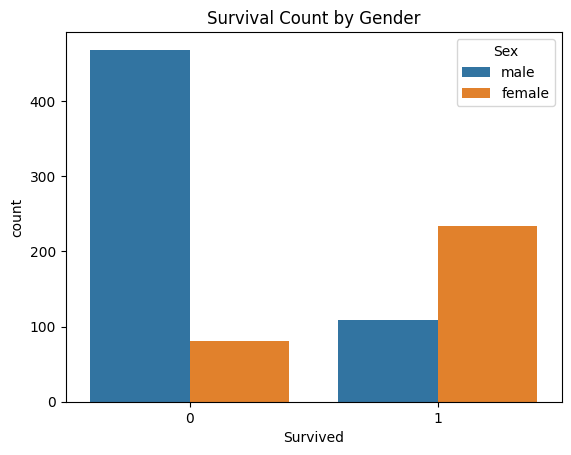

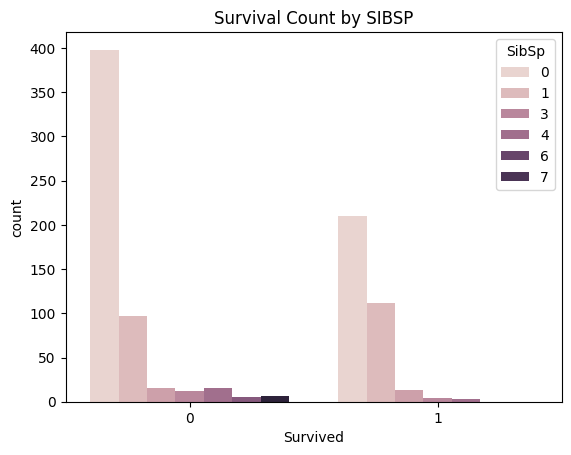

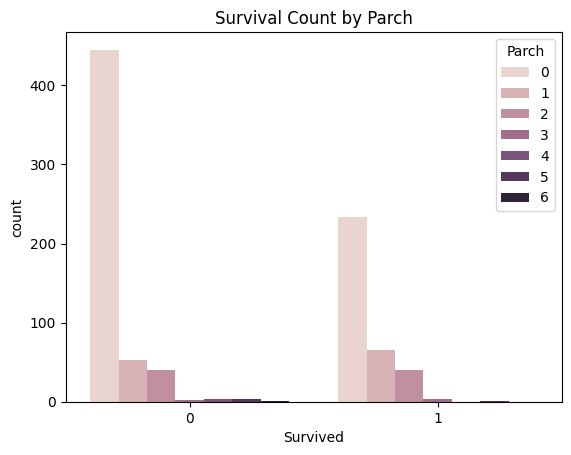

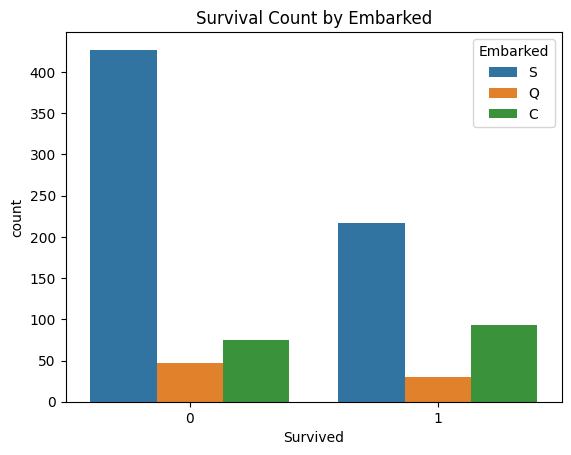

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of survival
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Count')
plt.show()

# Visualize survival by Ticket Class
sns.countplot(x='Survived', hue='Pclass', data=train_data)
plt.title('Survival Count by Ticket Class')
plt.show()


# Visualize survival by Age
plt.figure(figsize=(12, 6))
sns.countplot(x='Survived', hue='Age', data=train_data)
plt.title('Survival Count by Age')
plt.show()


# Visualize survival by gender
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.title('Survival Count by Gender')
plt.show()

# Visualize survival by SIBSP
sns.countplot(x='Survived', hue='SibSp', data=train_data)
plt.title('Survival Count by SIBSP')
plt.show()

# Visualize survival by Parch
sns.countplot(x='Survived', hue='Parch', data=train_data)
plt.title('Survival Count by Parch')
plt.show()

# Visualize survival by Embarked
sns.countplot(x='Survived', hue='Embarked', data=train_data)
plt.title('Survival Count by Embarked')
plt.show()


**4. Correlation Analysis:**

    Check for correlations between features to see if any are strongly related to survival.

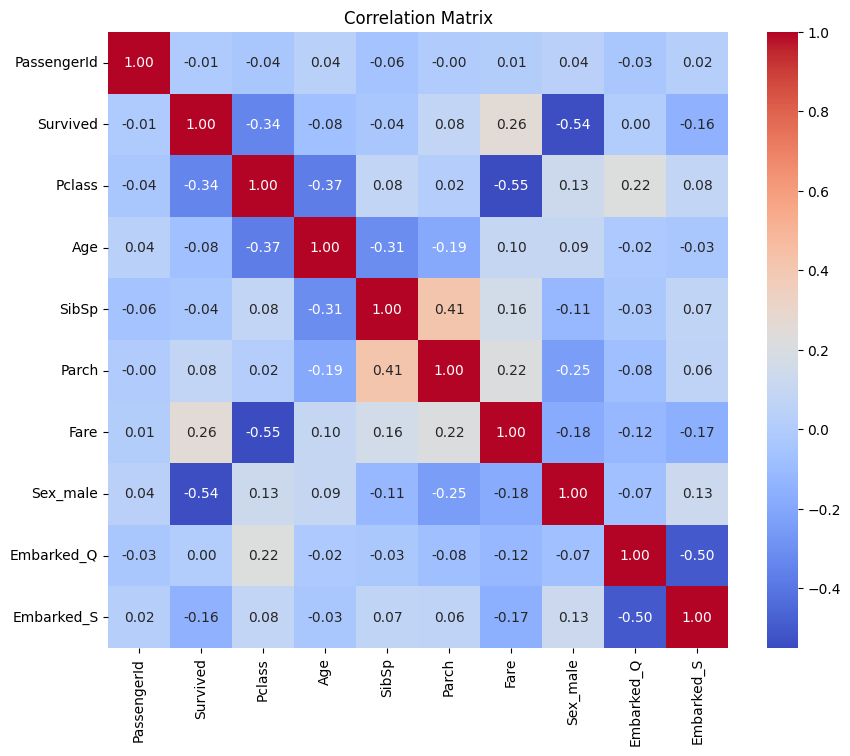

In [6]:
# Drop non-numeric columns
train_data_cleaned = train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Convert categorical variables to numeric using one-hot encoding
train_data_encoded = pd.get_dummies(train_data_cleaned, drop_first=True)

# Calculate the correlation matrix
correlation_matrix = train_data_encoded.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


### Data Preprocessing Overview
- This step is crucial for preparing your data for modeling. Here's what we'll cover:

    * Handling Missing Values: Techniques to deal with any missing data in the dataset.
    * Encoding Categorical Variables: Converting non-numeric categories into a format that can be used for modeling.
    * Feature Scaling: Standardizing or normalizing numerical features, if necessary.

### Handling Missing Values
    In the Titanic dataset, some passengers may have missing values in certain columns. It’s essential to handle these missing values before training your model because most machine learning algorithms cannot process them.

- Steps to Handle Missing Values:
    - Identify Missing Values: Check for any missing values in your dataset.
    - Decide on a Strategy: You can either drop rows/columns with missing values or impute them (fill them with reasonable estimates).
    - Implement the Chosen Strategy: Depending on your decision, either drop the missing data or fill in the gaps.


1. Identify Missing Values

In [7]:
# Check for missing values
missing_values = train_data.isnull().sum()
print(missing_values[missing_values > 0])  # Display only columns with missing values


Age         177
Cabin       687
Embarked      2
dtype: int64


#### 2. Decide on a Strategy
- Here are some common strategies:

    - Drop Rows: If the percentage of missing data is very low, you might choose to drop those rows.

    - Drop Columns: If an entire column has a lot of missing values and isn’t critical, you might drop that column.

    - Impute Missing Values: Fill missing values with:

        - The mean (for numerical features).
        - The median (less affected by outliers).
        - The mode (most frequent value for categorical features).
        - A constant value (like 0 or “Unknown”).
        - More complex methods (like using another algorithm).

**Dropping Rows or Columns:**

In [8]:
# Drop rows with missing target values (if any)
train_data = train_data.dropna(subset=['Survived'])

# Drop columns with a high percentage of missing values
train_data = train_data.drop(['Cabin'], axis=1)  # Example: dropping 'Cabin'

**Imputing Missing Values:**

In [9]:
# Fill missing values in 'Age' and 'Embarked'
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

# Verifying no missing values remain
print(train_data.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### Summary
    1. Identify Missing Values: Use isnull().sum() to find out which columns have missing values.
    2. Choose a Strategy: Decide whether to drop or impute missing values based on their significance and amount.
    3. Implement the Strategy: Use the appropriate methods to handle the missing data in your dataset.

## Encoding Categorical Variables
Why is this important?

Many machine learning models cannot work directly with categorical (non-numeric) data. Therefore, it is necessary to convert these categorical variables into a numerical format before training your model. This step ensures that the model can interpret the data correctly and that meaningful relationships between features and the target variable are preserved.



**Identify Categorical Variables:**

First, identify the columns in your dataset that contain categorical data. These are often columns with text values, such as gender, class, or location.

In [10]:
# Checking for categorical data types
train_data.select_dtypes(include=['object']).columns


Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

### Choose an Encoding Method:

- **For Sex**: Since there are only two categories (male/female), you can use Label Encoding to convert Sex into a binary format (0 for male, 1 for female):

    Now, male will be represented by 0 and female by 1.

- **For Embarked**: The Embarked column contains three categories (S, C, Q), which are nominal (no natural order), so we use One-Hot Encoding to convert this into binary columns:

    This will generate two new columns: Embarked_Q and Embarked_S (with Embarked_C dropped to avoid multicollinearity).

- **For Ticket**: The Ticket column contains numerous unique alphanumeric values (like ticket numbers), which typically don't have predictive power. Depending on the analysis, you could either drop this column or engineer a more meaningful feature (e.g., extracting information from the ticket format).

- **For Name**: The Name column is also text-heavy and doesn’t provide immediate numerical value. Like the Ticket column, it can be dropped, or you could attempt feature engineering (e.g., extracting titles like "Mr", "Mrs", etc.).


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['Sex'] = le.fit_transform(train_data['Sex'])

In [12]:
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True, dtype='int')


In [13]:
train_data = train_data.drop(['Name'],axis=1)
train_data = train_data.drop(['Ticket'],axis=1)

**Verify the Encoding**

In [14]:
train_data.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
886,887,0,2,1,27.0,0,0,13.00,0,1
887,888,1,1,0,19.0,0,0,30.00,0,1
888,889,0,3,0,28.0,1,2,23.45,0,1
889,890,1,1,1,26.0,0,0,30.00,0,0
890,891,0,3,1,32.0,0,0,7.75,1,0


### Feature Scaling
**Why is Feature Scaling Important?**

In many machine learning algorithms, such as logistic regression, support vector machines (SVMs), and neural networks, the model’s performance can be significantly affected by differences in the scale of features. For example, if one feature ranges from 0 to 1 (like Pclass) and another from 0 to 80 (like Age), algorithms may give more importance to the feature with a larger range, which can skew the results.

Thus, we scale or normalize features so that they are on a comparable range.

In [15]:
"""
from sklearn.preprocessing import StandardScaler

# Creating the scaler object
#scaler = StandardScaler()

# Choosing the columns to scale
columns_to_scale = ['Age', 'Fare']

# Applying the scaler to the train_data
train_data[columns_to_scale] = scaler.fit_transform(train_data[columns_to_scale])

# Checking the result
train_data.head()
"""

"\nfrom sklearn.preprocessing import StandardScaler\n\n# Creating the scaler object\n#scaler = StandardScaler()\n\n# Choosing the columns to scale\ncolumns_to_scale = ['Age', 'Fare']\n\n# Applying the scaler to the train_data\ntrain_data[columns_to_scale] = scaler.fit_transform(train_data[columns_to_scale])\n\n# Checking the result\ntrain_data.head()\n"

## Building the Model
**Splitting the Data**

    Before we train our machine learning model, we need to split our dataset into two parts:

- Training Set: Used to train the model.
- Testing Set: Used to evaluate the model’s performance on unseen data.
- Typically, we use an 80/20 or 70/30 split (i.e., 80% of the data for training and 20% for testing).

**Why Split the Data?**
- Avoid Overfitting: We want to ensure the model performs well on unseen data, not just the training data.
- Performance Evaluation: By testing the model on data it hasn’t seen, we can estimate how well it will perform on real-world data.

In [16]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = train_data.drop(['Survived', 'PassengerId'], axis=1)
y = train_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (712, 8)
X_test shape: (179, 8)
y_train shape: (712,)
y_test shape: (179,)


### Choosing a Model
In this step, we’ll select a machine learning model suitable for our classification task. Given that our goal is to predict whether a passenger survived (a binary outcome: survived or not), logistic regression is a great starting point.

**Why Logistic Regression?**

- Interpretability: It's easy to understand and interpret the results.
- Binary Classification: It’s specifically designed for binary classification problems.
- Baseline Model: It serves as a good baseline to compare against more complex models.

**Steps to Implement Logistic Regression:**
- Import the Model: Use scikit-learn’s LogisticRegression class.
- Create an Instance: Instantiate the model.
- Fit the Model: Train the model using the training data.
- Make Predictions: Use the trained model to make predictions on the test data.

In [17]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the Logistic Regression model
log_reg = LogisticRegression(max_iter=500)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test)

# Display predictions
print("Predictions:", y_pred)


Predictions: [0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]


## Model Evaluation
Evaluating the performance of your model is crucial to understand how well it predicts outcomes. For our Titanic survival model, we will use several evaluation metrics, including accuracy, confusion matrix, precision, recall, and F1-score.

**Steps to Evaluate the Model:**
- Calculate Accuracy: The proportion of correct predictions.
- Confusion Matrix: A table that summarizes the performance of the classification model.
- Precision and Recall: Metrics that give insight into the model’s performance concerning the positive class (survival).
- F1-Score: The harmonic mean of precision and recall.

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", class_report)


Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



## Hyperparameter Tuning
**Objective:**

- Hyperparameter tuning aims to find the best combination of hyperparameters for your model to improve its performance. - Hyperparameters are settings that are not learned from the data but are specified before the training process begins. - Optimizing these parameters can significantly enhance the model’s accuracy and overall effectiveness.

**Common Hyperparameters to Tune:**

- Regularization Parameters:

    - Logistic Regression: The C parameter controls the inverse of regularization strength. A smaller value specifies stronger regularization.

In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l2'], 'max_iter': [300,400,500,600]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, scoring='accuracy', cv=8)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

In [20]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the Logistic Regression model
log_reg = LogisticRegression(max_iter=500)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test)

# Display predictions
print("Predictions:", y_pred)


Predictions: [0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]


In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", class_report)

Accuracy: 0.81
Confusion Matrix:
 [[90 15]
 [19 55]]
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



## Feature Engineering
**Generalized Point of View (What is Feature Engineering? Why is it Important?)**

Feature engineering refers to the process of creating new features or modifying existing ones to improve the performance of machine learning models. The better the features, the better the model performs.

In [22]:
train_data['family_size'] = train_data['SibSp']+train_data['Parch']+1

In [23]:
train_data = train_data.drop(['SibSp','Parch'],axis=1)

In [24]:
# Binning Fare into 3 categories: Low, Medium, High
train_data['Fare_Bin'] = pd.qcut(train_data['Fare'], 3, labels=['Low_Fare', 'Medium_Fare', 'High_Fare'])

# Binning Age into 4 categories
train_data['Age_Bin'] = pd.cut(train_data['Age'], bins=[0, 12, 19, 60, 100], labels=['Child', 'Teenager', 'Adult', 'Senior'])

In [25]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,family_size,Fare_Bin,Age_Bin
0,1,0,3,1,22.0,7.2500,0,1,2,Low_Fare,Adult
1,2,1,1,0,38.0,71.2833,0,0,2,High_Fare,Adult
2,3,1,3,0,26.0,7.9250,0,1,1,Low_Fare,Adult
3,4,1,1,0,35.0,53.1000,0,1,2,High_Fare,Adult
4,5,0,3,1,35.0,8.0500,0,1,1,Low_Fare,Adult


In [26]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked_Q     0
Embarked_S     0
family_size    0
Fare_Bin       0
Age_Bin        0
dtype: int64

In [27]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to 'Age_Binned'
train_data['Age_Bin'] = label_encoder.fit_transform(train_data['Age_Bin'])

# Use One-Hot Encoding for 'Fare_Binned' (if you created bins for Fare)
train_data = pd.get_dummies(train_data, columns=['Fare_Bin'], prefix='Fare', dtype='int')

In [28]:
from sklearn.preprocessing import StandardScaler

# Creating the scaler object
scaler = StandardScaler()

# Choosing the columns to scale
columns_to_scale = ['Age']

# Applying the scaler to the train_data
train_data[columns_to_scale] = scaler.fit_transform(train_data[columns_to_scale])

In [29]:
train_data = train_data.drop(['Fare'],axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked_Q,Embarked_S,family_size,Age_Bin,Fare_Low_Fare,Fare_Medium_Fare,Fare_High_Fare
0,1,0,3,1,-0.565736,0,1,2,0,1,0,0
1,2,1,1,0,0.663861,0,0,2,0,0,0,1
2,3,1,3,0,-0.258337,0,1,1,0,1,0,0
3,4,1,1,0,0.433312,0,1,2,0,0,0,1
4,5,0,3,1,0.433312,0,1,1,0,1,0,0


In [30]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = train_data.drop(['Survived', 'PassengerId'], axis=1)
y = train_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (712, 10)
X_test shape: (179, 10)
y_train shape: (712,)
y_test shape: (179,)


In [31]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the Logistic Regression model
log_reg = LogisticRegression(max_iter=500)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test)

# Display predictions
print("Predictions:", y_pred)


Predictions: [0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]


In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", class_report)

Accuracy: 0.82
Confusion Matrix:
 [[89 16]
 [17 57]]
Precision: 0.7808219178082192
Recall: 0.7702702702702703
F1 Score: 0.7755102040816326
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [33]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
# Drop columns with a high percentage of missing values
test_data = test_data.drop(['Cabin'], axis=1)  # Example: dropping 'Cabin'

# Fill missing values in 'Age' and 'Embarked'
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])



In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_data['Sex'] = le.fit_transform(test_data['Sex'])

test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True, dtype='int')

test_data = test_data.drop(['Name'],axis=1)
test_data = test_data.drop(['Ticket'],axis=1)

In [36]:
test_data['family_size'] = test_data['SibSp']+test_data['Parch']+1
test_data = test_data.drop(['SibSp','Parch'],axis=1)
# Binning Fare into 3 categories: Low, Medium, High
test_data['Fare_Bin'] = pd.qcut(test_data['Fare'], 3, labels=['Low_Fare', 'Medium_Fare', 'High_Fare'])

# Binning Age into 4 categories
test_data['Age_Bin'] = pd.cut(test_data['Age'], bins=[0, 12, 19, 60, 100], labels=['Child', 'Teenager', 'Adult', 'Senior'])


In [37]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to 'Age_Binned'
test_data['Age_Bin'] = label_encoder.fit_transform(test_data['Age_Bin'])

# Use One-Hot Encoding for 'Fare_Binned' (if you created bins for Fare)
test_data = pd.get_dummies(test_data, columns=['Fare_Bin'], prefix='Fare', dtype='int')

In [38]:
test_data.tail()

,PassengerId,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,family_size,Age_Bin,Fare_Low_Fare,Fare_Medium_Fare,Fare_High_Fare
413,1305,3,1,27.0,8.0500,0,1,1,0,1,0,0
414,1306,1,0,39.0,108.9000,0,0,1,0,0,0,1
415,1307,3,1,38.5,7.2500,0,1,1,0,1,0,0
416,1308,3,1,27.0,8.0500,0,1,1,0,1,0,0
417,1309,3,1,27.0,22.3583,0,0,3,0,0,1,0


In [39]:
from sklearn.preprocessing import StandardScaler

# Creating the scaler object
scaler = StandardScaler()

# Choosing the columns to scale
columns_to_scale = ['Age']

# Applying the scaler to the test_data
test_data[columns_to_scale] = scaler.fit_transform(test_data[columns_to_scale])

In [40]:
test_data = test_data.drop(['Fare'],axis=1)
test_data.head()

,PassengerId,Pclass,Sex,Age,Embarked_Q,Embarked_S,family_size,Age_Bin,Fare_Low_Fare,Fare_Medium_Fare,Fare_High_Fare
0,892,3,1,0.386231,1,0,1,0,1,0,0
1,893,3,0,1.371370,0,1,2,0,1,0,0
2,894,2,1,2.553537,1,0,1,2,0,1,0
3,895,3,1,-0.204852,0,1,1,0,1,0,0
4,896,3,0,-0.598908,0,1,3,0,0,1,0


In [43]:
# Define X (features) and y (target)
features = test_data.drop(['PassengerId'],axis=1)

In [44]:
# Make predictions
predictions = log_reg.predict(features)

In [45]:
# Create a DataFrame for submission
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],  # Make sure to include PassengerId
    'Survived': predictions
})

# Save to CSV
submission.to_csv('submission.csv', index=False)

In [46]:
print(len(predictions))  # Should be the same as the number of rows in test_data
print(len(test_data))     # Check the length of your test data


418
418
